My comments are included in the shared report.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("global_economy.csv")
df.head()


,unique_id,Code,ds,GDP,Growth,CPI,Imports,Exports,Population
0,Afghanistan,AFG,1960,5.377778e+08,NaN,NaN,7.024793,4.132233,8996351.0
1,Afghanistan,AFG,1961,5.488889e+08,NaN,NaN,8.097166,4.453443,9166764.0
2,Afghanistan,AFG,1962,5.466667e+08,NaN,NaN,9.349593,4.878051,9345868.0
3,Afghanistan,AFG,1963,7.511112e+08,NaN,NaN,16.863910,9.171601,9533954.0
4,Afghanistan,AFG,1964,8.000000e+08,NaN,NaN,18.055555,8.888893,9731361.0


In [4]:
# Filtering the data for Turkey
turkey = df[df["unique_id"] == "Turkey"][["ds", "Exports"]].copy()
turkey["ds"] = pd.to_datetime(turkey["ds"].astype(str))
turkey = turkey.sort_values("ds")


1st Question - Plot the Exports series and discuss the main features of the data.

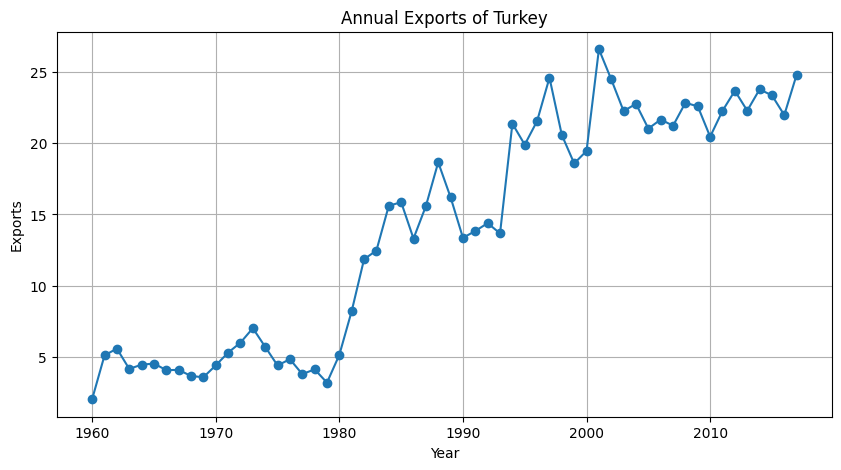

In [5]:
plt.figure(figsize=(10,5))
plt.plot(turkey["ds"], turkey["Exports"], marker="o")
plt.title("Annual Exports of Turkey")
plt.xlabel("Year")
plt.ylabel("Exports")
plt.grid(True)
plt.show()


In [6]:
!pip install statsforecast


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.6/354.6 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.7/280.7 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


2-Use an ETS(A,N,N) model to forecast the series, and plot the forecasts.

In [7]:
from statsforecast import StatsForecast
from statsforecast.models import AutoETS
import pandas as pd
import matplotlib.pyplot as plt



In [8]:
# Preparing data in StatsForecast format
sf_data = turkey.rename(columns={"Exports": "y"})
sf_data["unique_id"] = "Turkey"
sf_data = sf_data[["unique_id", "ds", "y"]]


In [9]:
# Defining ETS(A,N,N) model
model_ann = AutoETS(
    season_length=1,  # annual data
    model="ANN"
)


In [10]:
# Model fitting and forecasting
sf = StatsForecast(
    models=[model_ann],
    freq="YE"
)

forecast_ann = sf.forecast(df=sf_data, h=10)
forecast_ann


,unique_id,ds,AutoETS
0,Turkey,2017-12-31,24.500118
1,Turkey,2018-12-31,24.500118
2,Turkey,2019-12-31,24.500118
3,Turkey,2020-12-31,24.500118
4,Turkey,2021-12-31,24.500118
5,Turkey,2022-12-31,24.500118
6,Turkey,2023-12-31,24.500118
7,Turkey,2024-12-31,24.500118
8,Turkey,2025-12-31,24.500118
9,Turkey,2026-12-31,24.500118


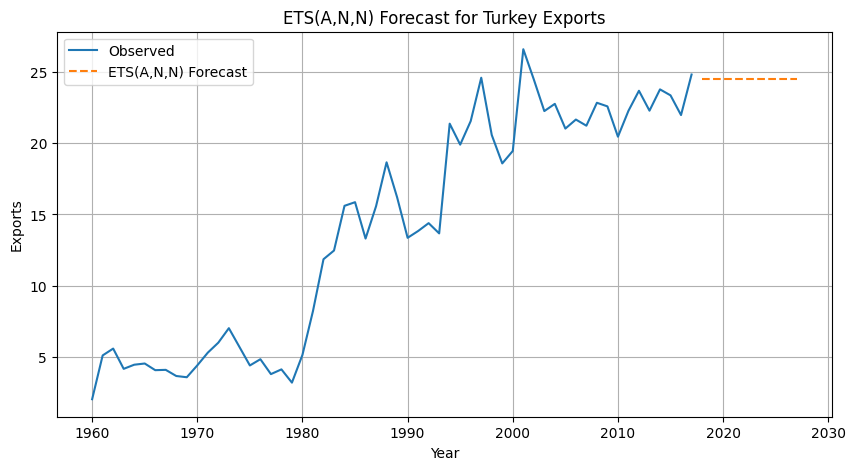

In [11]:
plt.figure(figsize=(10,5))

# Observed data
plt.plot(sf_data["ds"], sf_data["y"], label="Observed")

# Forecast
plt.plot(forecast_ann["ds"], forecast_ann["AutoETS"],
         label="ETS(A,N,N) Forecast", linestyle="--")

plt.title("ETS(A,N,N) Forecast for Turkey Exports")
plt.xlabel("Year")
plt.ylabel("Exports")
plt.legend()
plt.grid(True)
plt.show()


3 - Compute the RMSE values for the training data.

In [12]:
from statsforecast import StatsForecast
from statsforecast.models import AutoETS

model_ann = AutoETS(
    season_length=1,
    model="ANN"
)

sf = StatsForecast(
    models=[model_ann],
    freq="YE"
)



In [13]:
sf.fit(sf_data)



StatsForecast(models=[AutoETS])

In [14]:
_ = sf.forecast(
    df=sf_data,
    h=1,
    fitted=True
)


In [15]:
insample = sf.forecast_fitted_values()
insample.head()


,unique_id,ds,y,AutoETS
0,Turkey,1960-01-01,2.055800,2.430276
1,Turkey,1961-01-01,5.124654,2.098310
2,Turkey,1962-01-01,5.603985,4.781111
3,Turkey,1963-01-01,4.184549,5.510574
4,Turkey,1964-01-01,4.473161,4.335076


In [16]:
import numpy as np

y_true = sf_data["y"].values
y_hat  = insample["AutoETS"].values

rmse_ann = np.sqrt(np.mean((y_true - y_hat)**2))
rmse_ann


np.float64(2.183256424996884)

4-Compare the results to those from an ETS(A,A,N) model. (Remember that the trended model is using one more parameter than the simpler model.) Discuss the merits of the two forecasting methods for this data set.

In [17]:
from statsforecast import StatsForecast
from statsforecast.models import AutoETS

# ETS(A,N,N)
model_ann = AutoETS(
    season_length=1,
    model="ANN",
    alias="ETS_ANN"
)

# ETS(A,A,N)
model_aan = AutoETS(
    season_length=1,
    model="AAN",
    alias="ETS_AAN"
)

# Initializing StatsForecast with both models
sf = StatsForecast(
    models=[model_ann, model_aan],
    freq="YE"
)

# Fitting the models to the data
sf.fit(sf_data)

# Generating forecasts for the next 10 years
fc = sf.forecast(df=sf_data, h=10, level=[95])
fc.head()


,unique_id,ds,ETS_ANN,ETS_ANN-lo-95,ETS_ANN-hi-95,ETS_AAN,ETS_AAN-lo-95,ETS_AAN-hi-95
0,Turkey,2017-12-31,24.500118,20.065360,28.934876,24.805701,20.382203,29.229198
1,Turkey,2018-12-31,24.500118,18.573696,30.426540,25.188014,19.466403,30.909625
2,Turkey,2019-12-31,24.500118,17.388306,31.611931,25.570328,18.794661,32.345994
3,Turkey,2020-12-31,24.500118,16.374032,32.626204,25.952641,18.265913,33.639370
4,Turkey,2021-12-31,24.500118,15.473011,33.527226,26.334955,17.834057,34.835852


In [18]:
import numpy as np

# Call forecast with fitted=True to obtain one-step-ahead fitted values
_ = sf.forecast(df=sf_data, h=1, fitted=True)

# Retrieve in-sample fitted values
insample = sf.forecast_fitted_values()

# True observed values
y_true = insample["y"].values

# Fitted values from each model (using aliases)
yhat_ann = insample["ETS_ANN"].values
yhat_aan = insample["ETS_AAN"].values

# Compute RMSE for both models
rmse_ann = np.sqrt(np.mean((y_true - yhat_ann) ** 2))
rmse_aan = np.sqrt(np.mean((y_true - yhat_aan) ** 2))

rmse_ann, rmse_aan



(np.float64(2.183256424996884), np.float64(2.137004016065145))

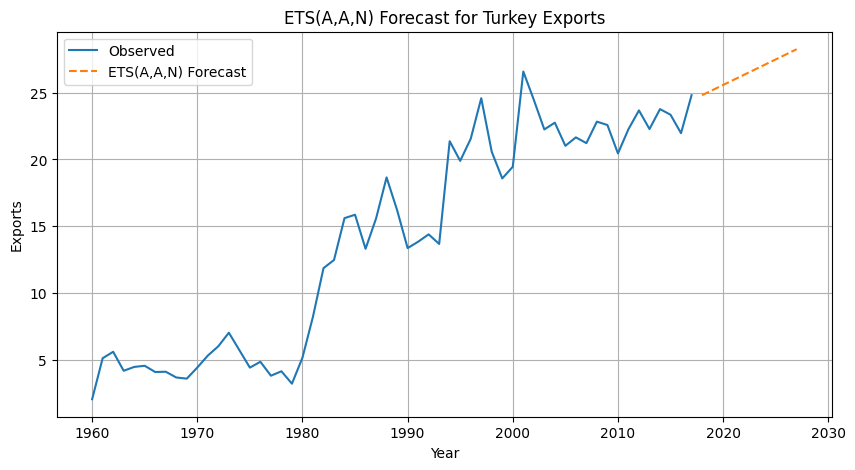

In [19]:
plt.figure(figsize=(10,5))

# Observed data
plt.plot(sf_data["ds"], sf_data["y"], label="Observed")

# ETS(A,A,N) forecast
plt.plot(
    fc["ds"],
    fc["ETS_AAN"],
    linestyle="--",
    label="ETS(A,A,N) Forecast"
)

plt.title("ETS(A,A,N) Forecast for Turkey Exports")
plt.xlabel("Year")
plt.ylabel("Exports")
plt.legend()
plt.grid(True)
plt.show()


Calculate a 95% prediction interval for the first forecast for each model, using the RMSE values and assuming normal errors. Compare your intervals with those produced using StatsForecast.

In [22]:
yhat_ann = fc["ETS_ANN"].iloc[0]
yhat_aan = fc["ETS_AAN"].iloc[0]

yhat_ann, yhat_aan


(np.float64(24.500118185909812), np.float64(24.80570051617729))

In [20]:
import numpy as np

# First forecast value
yhat_ann = fc["ETS_ANN"].iloc[0]

# 95% PI using RMSE
lower_ann = yhat_ann - 1.96 * rmse_ann
upper_ann = yhat_ann + 1.96 * rmse_ann

lower_ann, upper_ann


(np.float64(20.22093559291592), np.float64(28.779300778903703))

In [21]:
# First forecast value
yhat_aan = fc["ETS_AAN"].iloc[0]

# 95% PI using RMSE
lower_aan = yhat_aan - 1.96 * rmse_aan
upper_aan = yhat_aan + 1.96 * rmse_aan

lower_aan, upper_aan


(np.float64(20.617172644689603), np.float64(28.994228387664975))